# 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# 2. Load data

In [2]:
df = pd.read_csv('../data/feature.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   user_id                                          956 non-null    object 
 1   days_passed_last_trip                            956 non-null    int64  
 2   days_passed_last_dropoff_trip                    956 non-null    float64
 3   days_passed_last_failed_trip                     956 non-null    float64
 4   days_passed_last_rider_cancel_trip               956 non-null    float64
 5   days_passed_last_driver_cancel_trip              956 non-null    float64
 6   numbers_of_dropoff_trips_last9m                  956 non-null    int64  
 7   numbers_of_failed_trips_last9m                   956 non-null    int64  
 8   numbers_of_trips_canceled_by_rider_last9m        956 non-null    int64  
 9   numbers_of_trips_canceled_by_dri

,user_id,days_passed_last_trip,days_passed_last_dropoff_trip,days_passed_last_failed_trip,days_passed_last_rider_cancel_trip,days_passed_last_driver_cancel_trip,numbers_of_dropoff_trips_last9m,numbers_of_failed_trips_last9m,numbers_of_trips_canceled_by_rider_last9m,numbers_of_trips_canceled_by_driver_last9m,...,total_distance_last9m,total_duration_last9m,avg_distance_last9m,avg_duration_last9m,avg_rider_score_last9m,is_last_trip_dropoff,is_last_trip_failed,is_last_trip_canceled_by_rider,is_last_trip_canceled_by_driver,label
0,00cb8ad6a0f7214d002e3ded6b7c9b80,122,122.0,0.0,0.0,0.0,7,0,0,0,...,88349.0,1723.0,12001.0,204.0,4.714286,1,0,0,0,1
1,00cb8ad6a0f7214d002e3ded6b7de012,100,100.0,0.0,296.0,0.0,5,0,2,0,...,42793.0,5722.0,8344.0,148.0,4.000000,1,0,0,0,1
2,00cb8ad6a0f7214d002e3ded6b7eb91b,316,316.0,0.0,0.0,0.0,1,0,0,0,...,15716.0,406.0,15716.0,406.0,5.000000,1,0,0,0,1
3,0194b4a5c9e41bfd35f9168423f7b7b4,314,0.0,0.0,314.0,0.0,0,0,2,0,...,0.0,0.0,0.0,0.0,4.663370,0,0,1,0,1
4,0194b4a5c9e41bfd35f9168423fa2857,136,136.0,0.0,174.0,0.0,23,0,11,0,...,125130.0,12231.0,5123.5,89.0,4.863636,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,ff1cb10b9edf79369742a37ce5d8d6f6,273,273.0,0.0,0.0,0.0,1,0,0,0,...,4776.0,76.0,4776.0,76.0,4.663370,1,0,0,0,1
952,ff5c924e0b630fd7c019a4234053c385,136,136.0,0.0,0.0,0.0,1,0,0,0,...,13720.0,61.0,13720.0,61.0,4.000000,1,0,0,0,1
953,ff5c924e0b630fd7c019a42340593ee2,259,259.0,0.0,0.0,0.0,1,0,0,0,...,3370.0,193.0,3370.0,193.0,5.000000,1,0,0,0,1
954,ff5c924e0b630fd7c019a42340594b55,92,92.0,0.0,111.0,112.0,30,0,7,1,...,224330.0,11363.0,4925.0,207.0,3.766667,1,0,0,0,1


# 3. Train test split

In [3]:
#Separating the data into response and predictor variables
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))

X: (956, 21)
y: (956,)


In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 1)

print('train set', X_train.shape, y_train.shape)
print('test set', X_test.shape, y_test.shape)

train set (764, 21) (764,)
test set (192, 21) (192,)


# 4. Class distribution

The number of `class 1` and `class 0` are quite evenly distributed, no `class imbalance` problem here.

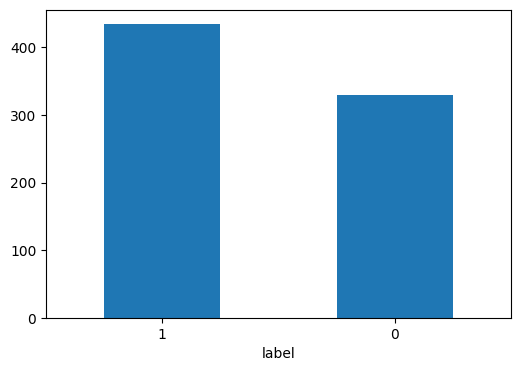

In [5]:
y_train.value_counts().plot(kind='bar', rot=0, figsize=(6,4));

# 5. Check `outliers`

- We will build a classifier to predict customer churn with **Logistic Regression**.
- **Logistic Regression** models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers. But the presence of extreme outliers may somehow affect the performance of the model and lowering the performance.
- So we will take a look at how outliers are present in the training set first and revise outliers if they really impact on the performance of our classifier in later section.

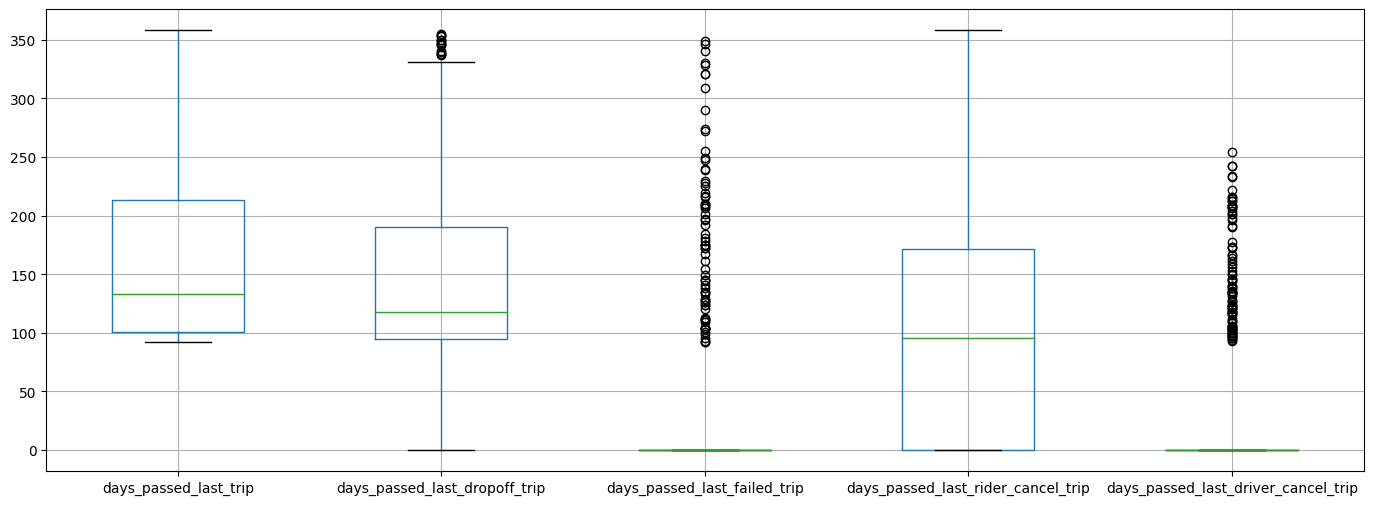

In [6]:
X_train[['days_passed_last_trip','days_passed_last_dropoff_trip','days_passed_last_failed_trip',
        'days_passed_last_rider_cancel_trip','days_passed_last_driver_cancel_trip']].boxplot(figsize=(17,6));

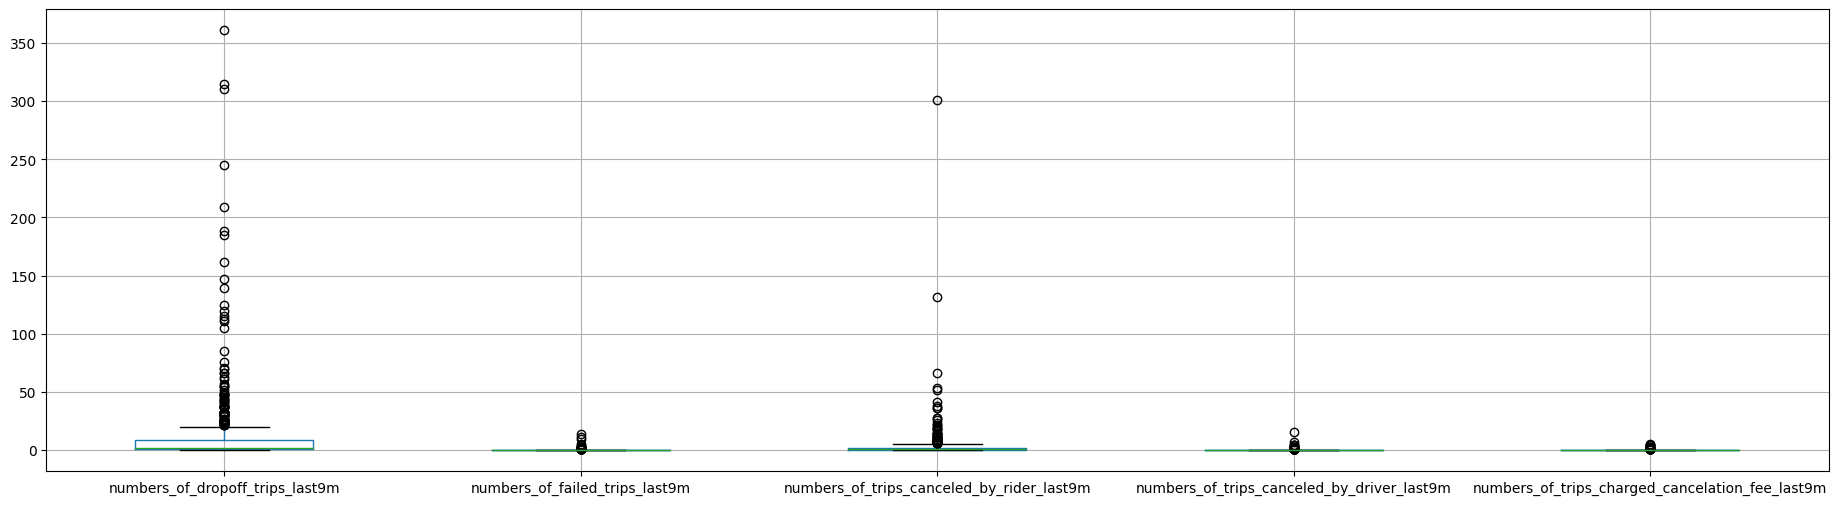

In [7]:
X_train[['numbers_of_dropoff_trips_last9m','numbers_of_failed_trips_last9m','numbers_of_trips_canceled_by_rider_last9m',
        'numbers_of_trips_canceled_by_driver_last9m','numbers_of_trips_charged_cancelation_fee_last9m']].boxplot(figsize=(23,6));

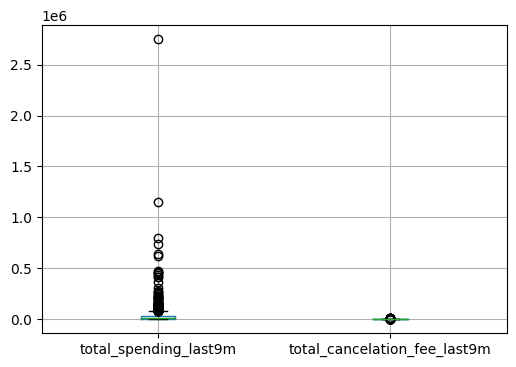

In [8]:
X_train[['total_spending_last9m','total_cancelation_fee_last9m']].boxplot(figsize=(6,4));

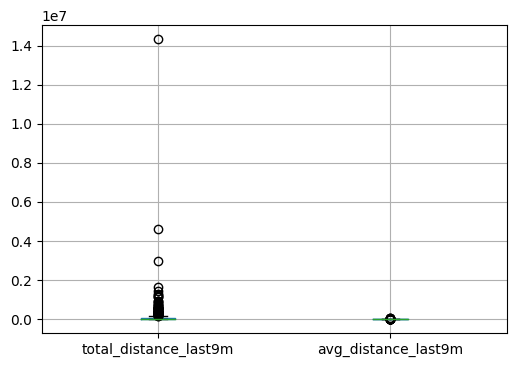

In [9]:
X_train[['total_distance_last9m','avg_distance_last9m']].boxplot(figsize=(6,4));

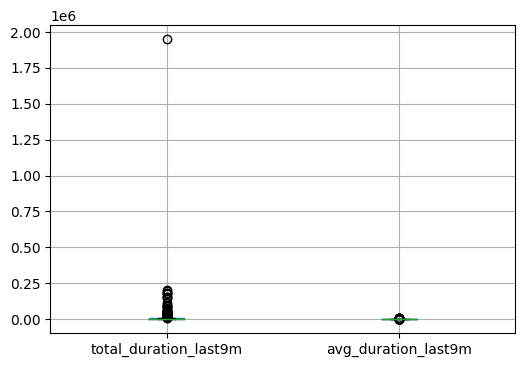

In [10]:
X_train[['total_duration_last9m','avg_duration_last9m']].boxplot(figsize=(6,4));

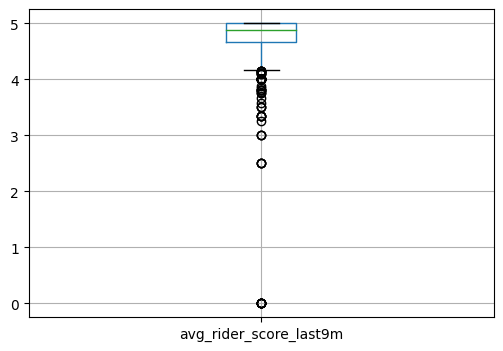

In [11]:
X_train[['avg_rider_score_last9m']].boxplot(figsize=(6,4));

# 6. Logistic Regression classifier

## 6.1. Cross validation

In [12]:
# 10-fold cross validation and logistic regression model
cv = KFold(n_splits=10, random_state=1, shuffle=True)
LR = LogisticRegression(solver='liblinear')

### 6.1.1. Trial 1

Leave everything as they are for cross validation.

In [13]:
scores = cross_val_score(LR, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('avg_accuracy: %.3f (std = %.3f)' % (np.mean(scores)*100, np.std(scores)*100))

avg_accuracy: 76.844 (std = 3.587)


The average accuracy with cross validation on the training set is just `76.844%` so the model is quite **underfitting**.

### 6.1.2. Trial 2

Apply **ANOVA f-test** on training set to rank feature importance, let's see the average accuracy as per k best features.

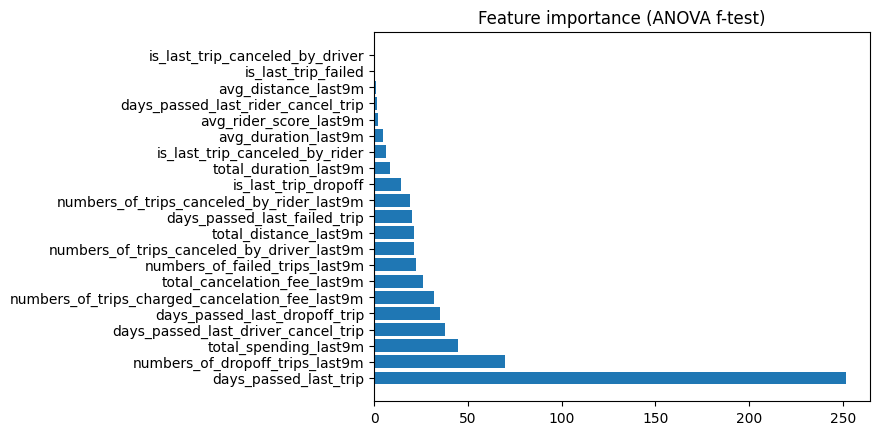

In [14]:
f.feature_importance_ANOVA_bar_chart(X_train, y_train)

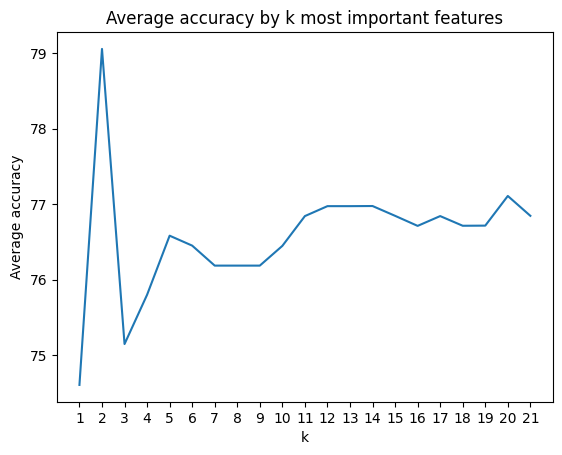

In [15]:
f.accuracy_by_top_k_features(cv, LR, X_train, y_train)

In [16]:
f.get_k_with_highest_accuracy(cv, LR, X_train, y_train)

At k = 2, we obtains the highest average accuracy = 79.05502392344499 (std = 4.776290414832825)


Although k=2 yields the highest accuracy but k=2 seems not to be practical so we will use k=14 with the accuracy at about 77%.

### 6.1.3. Trial 3

**Normalize feature** with `zscore` and leave everything as they are for model training

In [17]:
X_train_nor = X_train.copy()
X_train_nor = X_train_nor.apply(zscore)
X_test_nor = X_test.copy()
X_test_nor = X_test_nor.apply(zscore)

In [18]:
scores = cross_val_score(LR, X_train_nor, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('avg_accuracy: %.3f (std = %.3f)' % (np.mean(scores)*100, np.std(scores)*100))

avg_accuracy: 78.539 (std = 5.419)


### 6.1.4. Trial 4

Keep using normalized training data and feed top k important features to cross validation.

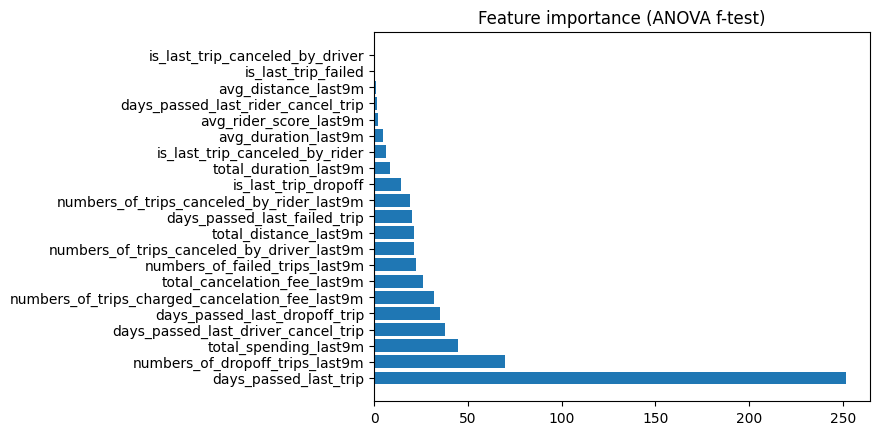

In [19]:
f.feature_importance_ANOVA_bar_chart(X_train_nor, y_train)

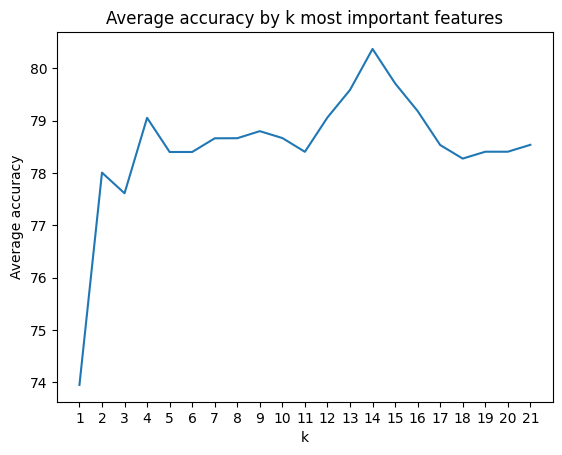

In [20]:
f.accuracy_by_top_k_features(cv, LR, X_train_nor, y_train)

In [21]:
f.get_k_with_highest_accuracy(cv, LR, X_train_nor, y_train)

At k = 14, we obtains the highest average accuracy = 80.37252221462748 (std = 4.195431983557358)


## 6.2. Fitting and Predict on test data

### 6.2.1. Trial 2

No feature scaling, fit the logistic regression model with top 14 important features on training data and then generalize on test data.

In [29]:
# Get a list of top 14 important features from the train data 
features_sorted = f.feature_important_ANOVA_f_test(X_train, y_train)[0]
# Get train and test data based on these sorted features
X_train_top14 = X_train[X_train.columns.intersection(features_sorted[:14])]
X_test_top14 = X_test[X_test.columns.intersection(features_sorted[:14])]
print('X_train_top14: {}'.format(X_train_top14.shape))
print('X_test_top14: {}'.format(X_test_top14.shape))

X_train_top14: (764, 14)
X_test_top14: (192, 14)


In [30]:
# Fit Logistic regression model
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train_top14, y_train)

LogisticRegression(solver='liblinear')

In [37]:
# Predict on test data
y_pred = clf.predict(X_test_top14)

## 6.3. Evaluation metric

In [32]:
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        78
           1       0.72      0.89      0.80       114

    accuracy                           0.73       192
   macro avg       0.74      0.70      0.70       192
weighted avg       0.74      0.73      0.72       192

Accuracy: 73.44


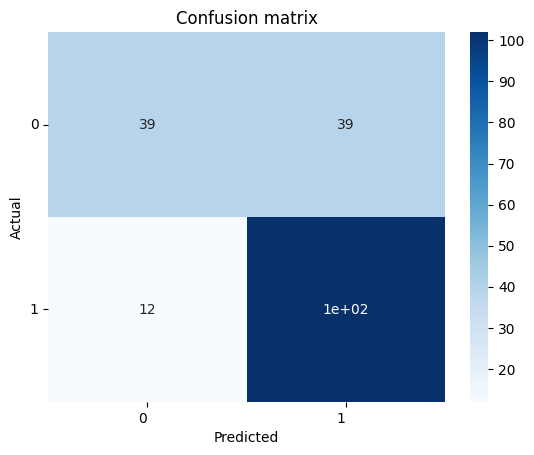

In [33]:
# confusion matrix
conmat = confusion_matrix(y_test, y_pred)
val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.show()  

## 6.4. Save model

In [34]:
# Save the model using Pickle for future use. Whenever we need to use this model to make prediction,
# just load this model (pickled_model = pickle.load(open('model.pkl', 'rb')))
pickle.dump(clf, open('classifier.pkl', 'wb'))

## 6.5. Save prediction result

In [35]:
pred_df = pd.DataFrame(y_pred, columns=['label']).set_index(X_test_top14.index)
userid_df = df.iloc[X_test.index][['user_id']]
prediction = pd.concat([userid_df, pred_df], axis=1)
prediction

,user_id,label
241,4a645cbfd25b64d34f738808634cdbb8,0
947,ff06947bbd085ec23b1cfa801e8ed972,1
436,7daf839429645c9e32dfb345719273ed,0
386,6a93cb8cf1ff4234508a40e9510962bd,0
345,649d38ea6680a3f6ee4a4b734f721a80,1
...,...,...
177,35e9968bb54e4382c317cdc069a6e299,1
605,a92faa0a8fe8d690b29dcaac2d70656a,1
60,13cd660fbea6e3b6221aa0fc6fcb8f58,0
268,55a921582f7b88ef61a3d8e24f3eacb4,0


In [36]:
prediction.to_csv('../data/prediction.csv')